In [2]:
#print("Instalar librerias necesarias")
#!pip install spectral specdal

# Espectros
Los que tienen nombre spectrum son los espectros de la tabla con el pigmento. Los que comienzan con A00 son de las cerámicas y estándares. Los que tienen extensión asd, son los que da el sistema, los que tienen extensión .txt son los ya procesados y los hr.txt son los procesados que ya se les ajustó la curva. Finalmente los espectros 12,13,14, 15 y 130 son cerámicas. Y los otros son los estándares 131-blanco, 132-Amarillo, 133-Rojo, 134-Azul y 135-Verde.

# Spectral Algorithms

Spectral Angle Mapper (SAM) is a physically-based spectral classification that uses an n-D angle to match pixels to reference spectra. The algorithm determines the spectral similarity between two spectra by calculating the angle between the spectra and treating them as vectors in a space with dimensionality equal to the number of bands. This technique, when used on calibrated reflectance data, is relatively insensitive to illumination and albedo effects. Endmember spectra can be directly extracted directly from an image as region of interest (ROI) mean spectra. SAM compares the angle between the endmember spectrum vector and each pixel vector in n-D space. Smaller angles represent closer matches to the reference spectrum. Pixels further away than the specified maximum angle threshold in radians are not classified.

SAM classification assumes reflectance data. However, if you use radiance data, the error is generally not significant because the origin is still near zero.

Reference: Kruse, F. A., A. B. Lefkoff, J. B. Boardman, K. B. Heidebrecht, A. T. Shapiro, P. J. Barloon, and A. F. H. Goetz. "The Spectral Image Processing System (SIPS) - Interactive Visualization and Analysis of Imaging spectrometer Data." Remote Sensing of Environment 44 (1993): 145-163.


SpecDAL Reference

https://specdal.readthedocs.io/en/latest/

https://specdal.readthedocs.io/en/latest/api.html

https://pyspectrum.readthedocs.io/en/latest/ref_others.html?highlight=derivative

<Axes: xlabel='wavelength'>

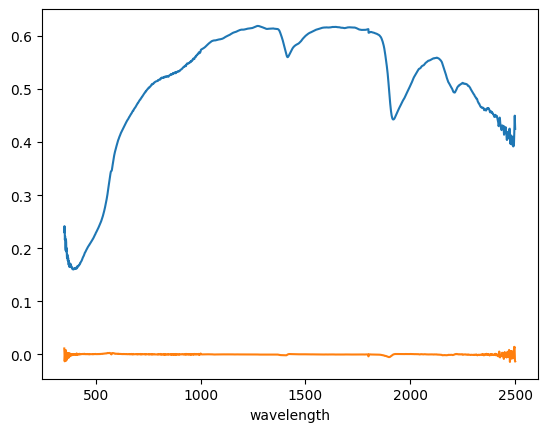

In [3]:
import specdal
# Pigmento
a00012 = 'Espectros FORS/A00012.asd'

s = specdal.Spectrum(filepath=a00012)
data_c=s.measurement
s.plot()

s.derivative()
s.plot()

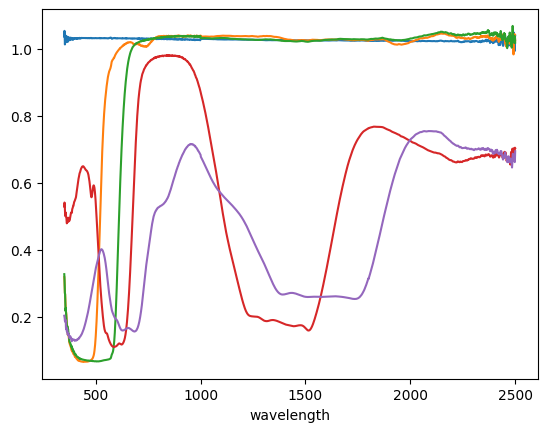

In [4]:
# estándares 131-blanco, 132-Amarillo, 133-Rojo, 134-Azul y 135-Verde.

# Estandar blanco
a00131 = 'Espectros FORS/A00131.asd'
a131 = specdal.Spectrum(filepath=a00131)
a131.plot()
data_blanco = a131.measurement


# Estandar amarillo
a00132 = 'Espectros FORS/A00132.asd'
a132 = specdal.Spectrum(filepath=a00132)
a132.plot()
data_amarillo = a132.measurement


# Estandar rojo
a00133 = 'Espectros FORS/A00133.asd'
a133 = specdal.Spectrum(filepath=a00133)
a133.plot()
data_rojo = a133.measurement

# Estandar azul
a00134 = 'Espectros FORS/A00134.asd'
a134 = specdal.Spectrum(filepath=a00134)
a134.plot()
data_azul = a134.measurement

# Estandar verde
a00135 = 'Espectros FORS/A00135.asd'
a135 = specdal.Spectrum(filepath=a00135)
a135.plot()
data_verde = a135.measurement

# K-Nearest Neighbors Algorithm

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

https://www.ibm.com/topics/knn



The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
  3. 1 Calculate the distance between the query example and the current example from the data.
  3. 2 Add the distance and the index of the example to an ordered collection

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances

5. Pick the first K entries from the sorted collection

6. Get the labels of the selected K entries

7. If regression, return the mean of the K labels

8. If classification, return the mode of the K labels

# Ejemplo de NearestNeighbors

Docs: https://scikit-learn.org/stable/modules/neighbors.html


In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [6]:
X = np.array([data_c,data_rojo])#,data_a])
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
print(distances)
nbrs.kneighbors_graph(X).toarray()

[[0.00000000e+00 2.11518746e+01]
 [6.74349576e-07 2.11518746e+01]]


c:\Users\nataa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\nataa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([[1., 1.],
       [1., 1.]])

In [7]:
X[1][1]

0.3159091691877229

MultiClass Classification Using K-Nearest Neighbours

https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76


# Spectral–Spatial HyperspectralImage Classification With K-Nearest Neighbor and Guided Filter
https://ieeexplore.ieee.org/document/8327484

KNN algorithm is a non-parametric method widely used for classification in pattern recognition. The main principle of KNN is that category of a data point is determined according to the classification of the nearest K neighbors. Take
$$T=\{(x_1,y_1),(x_2,y_2),⋯,(x_N,y_N)\}$$
as a training set, and $N$ is the number of training entities. Here $x_i \in R^d$ denotes the feature vectors, and $y_i \in Y=\{c_1,c_2,...,c_m\}$ denotes the labels of classification, $i=1,2,\dots,N$. Given an input $x$, we can obtain the k-nearest neighbors $N_k(x)$ by computing the distance with the traing

En nuestro caso: Tomemos $\text{data_r}$ el espectro del éstandar rojo. El cual tiene $\texttt{features: wavelength, reflectance}$

https://numpy.org/doc/stable/reference/generated/numpy.ndarray.fill.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


fit(X, y)
Fit the k-nearest neighbors classifier from the training dataset.

Parameters:

X **{array-like, sparse matrix}** of shape (n_samples, n_features) or (n_samples, n_samples) if metric=’precomputed’
Training data.


y **{array-like, sparse matrix}** of shape (n_samples,) or (n_samples, n_outputs)
Target values.

Mi implentación

In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

# Crear dataFrame apropiado para el modelo
# Tiene la forma wavelength, reflectance, class

# estándares 131-blanco, 132-Amarillo, 133-Rojo, 134-Azul y 135-Verde.
reflectance = np.array(data_blanco)
size = len(reflectance) #size=2151
indexes=data_amarillo.index


tmp_class = ['blanco' for i in range(size)]
reflectance = np.array(data_blanco)
array_b = np.stack([indexes,reflectance,tmp_class], axis=1)

tmp_class = ['amarillo' for i in range(size)]
reflectance = np.array(data_amarillo)
array_a = np.stack([indexes,reflectance,tmp_class], axis=1)

tmp_class = ['rojo' for i in range(size)]
reflectance = np.array(data_rojo)
array_r = np.stack([indexes,reflectance,tmp_class], axis=1)

tmp_class = ['azul' for i in range(size)]

reflectance = np.array(data_azul)
array_z = np.stack([indexes,reflectance,tmp_class], axis=1)

tmp_class = ['verde' for i in range(size)]
reflectance = np.array(data_verde)
array_v = np.stack([indexes,reflectance,tmp_class], axis=1)

# Concatenate Target values
y = np.concatenate((array_b,array_a,array_r,array_z,array_v))
#print("Y=")
#print(y)

# X Training data
X_b = np.array(data_blanco)
X_a = np.array(data_amarillo)
X_r = np.array(data_rojo)
X_z = np.array(data_azul)
X_v = np.array(data_verde)

t = [2 for i in range(len(reflectance))]
array_X_b = np.stack([X_b,t], axis=1)
array_X_a = np.stack([X_a,t], axis=1)
array_X_r = np.stack([X_r,t], axis=1)
array_X_z = np.stack([X_z,t], axis=1)
array_X_v = np.stack([X_v,t], axis=1)
array_X = np.concatenate((array_X_b,array_X_a,array_X_r,array_X_z,array_X_v))


# = data_a  # y Target values
classes = np.array(['blanco','amarillo','rojo','azul','verde'])
neigh = KNeighborsClassifier()
neigh.classes_ = classes
neigh.n_features_in_=2
neigh.n_jobs=3

neigh.fit(array_X,y)


X = np.array(data_amarillo)
t = [2 for i in range(len(reflectance))]
array_X = np.stack([X,t], axis=1)
print("X=")
array_X = np.concatenate((array_X,array_X,array_X,array_X,array_X))
print(array_X)

prediccion=neigh.predict(array_X)
print("Prediccion=")
print(prediccion)
frec = {'blanco':0,'amarillo':0,'rojo':0,'azul':0,'verde':0}
for ren in prediccion:
  elem=ren[2]
  if elem in frec:
    frec[elem] +=1

print(frec)

print("Probabilidad por clase: ")
neigh.predict_proba(array_X)[2]



X=
[[0.31768012 2.        ]
 [0.3082156  2.        ]
 [0.28821778 2.        ]
 ...
 [1.03642899 2.        ]
 [1.03409547 2.        ]
 [1.02514164 2.        ]]
Prediccion=
[['1171.0' '0.31690975709396774' 'verde']
 ['1175.0' '0.30771199349608047' 'verde']
 ['1183.0' '0.28787235538342215' 'verde']
 ...
 ['1023.0' '1.0364192072956342' 'amarillo']
 ['1371.0' '1.0340701345989025' 'amarillo']
 ['1488.0' '1.025139617071973' 'amarillo']]
{'blanco': 1490, 'amarillo': 7410, 'rojo': 1225, 'azul': 500, 'verde': 130}
Probabilidad por clase: 


array([[0.2, 0.2, 0. , 0. , 0.6],
       [0.2, 0.2, 0. , 0. , 0.6],
       [0.2, 0.2, 0. , 0. , 0.6],
       ...,
       [0.8, 0. , 0. , 0.2, 0. ],
       [0.8, 0. , 0.2, 0. , 0. ],
       [0.8, 0. , 0.2, 0. , 0. ]])

Ahora que puede clasificarse a si mismo, podemos probar con una ceramica

In [9]:
X = np.array(data_c)
t = [2 for i in range(len(reflectance))]
array_X = np.stack([X,t], axis=1)
print("X=")
array_X = np.concatenate((array_X,array_X,array_X,array_X,array_X))
print(array_X)

prediccion=neigh.predict(array_X)
print("Prediccion=")
print(prediccion)
frec = {'blanco':0,'amarillo':0,'rojo':0,'azul':0,'verde':0}
for ren in prediccion:
  elem=ren[2]
  if elem in frec:
    frec[elem] +=1

print(frec)

print("Probabilidad por clase: ")
neigh.predict_proba(array_X)[2]


X=
[[0.23030175 2.        ]
 [0.24164036 2.        ]
 [0.23810332 2.        ]
 ...
 [0.44968123 2.        ]
 [0.43788075 2.        ]
 [0.42488017 2.        ]]
Prediccion=
[['1208.0' '0.2288434510918073' 'azul']
 ['1202.0' '0.2408542683893737' 'azul']
 ['1204.0' '0.23742775604262517' 'azul']
 ...
 ['1234.0' '0.4486554097073453' 'verde']
 ['1243.0' '0.43683594629755873' 'verde']
 ['1131.0' '0.42380791064626616' 'verde']]
{'blanco': 0, 'amarillo': 0, 'rojo': 0, 'azul': 2840, 'verde': 7915}
Probabilidad por clase: 


array([[0. , 0.6, 0. , 0. , 0.4],
       [0. , 0.8, 0. , 0. , 0.2],
       [0.2, 0.4, 0. , 0.2, 0.2],
       ...,
       [0. , 0.4, 0. , 0. , 0.6],
       [0. , 0.2, 0. , 0.2, 0.6],
       [0. , 0.4, 0. , 0. , 0.6]])

# Seccionar espectro


In [10]:
s=pd.cut(data_amarillo, 20)
print(s.values)
s.__array__()

[(0.31, 0.359], (0.261, 0.31], (0.261, 0.31], (0.261, 0.31], (0.261, 0.31], ..., (0.997, 1.046], (0.997, 1.046], (0.997, 1.046], (0.997, 1.046], (0.997, 1.046]]
Length: 2151
Categories (20, interval[float64, right]): [(0.0634, 0.113] < (0.113, 0.163] < (0.163, 0.212] < (0.212, 0.261] ... (0.849, 0.898] < (0.898, 0.947] < (0.947, 0.997] < (0.997, 1.046]]


array([Interval(0.31, 0.359, closed='right'),
       Interval(0.261, 0.31, closed='right'),
       Interval(0.261, 0.31, closed='right'), ...,
       Interval(0.997, 1.046, closed='right'),
       Interval(0.997, 1.046, closed='right'),
       Interval(0.997, 1.046, closed='right')], dtype=object)

# Bayes ingenuo

Naive Bayes classifier calculates the probability of an event in the following steps:

Step 1: Calculate the prior probability for given class labels
Step 2: Find Likelihood probability with each attribute for each class
Step 3: Put these value in Bayes Formula and calculate posterior probability.
Step 4: See which class has a higher probability, given the input belongs to the higher probability class.
https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

X: array-like of shape (n_samples, n_features)
Training vectors, where n_samples is the number of samples and n_features is the number of features.

y: array-like of shape (n_samples,)
Target values.

# Ejemplo

In [11]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0].size)
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 0.40, random_state = 42
)
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(train, train_labels)
print(GNBclf.classes_)
#preds = GNBclf.predict(test)
#print(preds)

['malignant' 'benign']
0
mean radius
30
[0 1]


----
# Aplicación

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
# data = {[X_b,X_a,...], [blanco,rojo],
#label_names = data['target_names']
label_names =  ['blanco','amarillo','rojo','azul','verde']

#labels = data['target']
labels = [0,1,2,3,4]

#feature_names = data['feature_names']
feature_names = ['wavelength','reflectance']

#features = data['data']
features = np.array((X_b,X_a,X_r,X_z,X_v))
print(features)

#print(label_names)
#print(labels[0])
#print(feature_names[1])
#print(features[0])
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 0.010, random_state = 22
)

from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
print(train_labels)
print(train.shape)

model = GNBclf.fit(train, train_labels)
print(model.classes_)
test=[data_blanco,data_amarillo,data_rojo,data_azul,data_verde]
preds = GNBclf.predict(test)

preds

[[1.03601978 1.05294596 1.03953671 ... 1.00538038 1.0343035  1.03891048]
 [0.31768012 0.3082156  0.28821778 ... 1.03642899 1.03409547 1.02514164]
 [0.32647601 0.31590917 0.29360698 ... 1.03742153 1.03308728 1.01794518]
 [0.52832173 0.54037536 0.53842611 ... 0.70281517 0.70404747 0.70269812]
 [0.20235901 0.19870536 0.19542333 ... 0.66104343 0.67225805 0.69327012]]
[2, 3, 0, 4]
(4, 2151)
[0 2 3 4]


array([0, 2, 2, 3, 4])

# Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train, train_labels)
reg.score(train, train_labels)
pb = reg.predict(np.array([data_blanco,data_amarillo,data_rojo,data_azul,data_verde]))
print("pb[0] =",round(pb[0],2))
print("pb[1] =",round(pb[1],2))
print("pb[2] =",round(pb[2],2))
print("pb[3] =",round(pb[3],2))
print("pb[4] =",round(pb[4],2))

pb[0] = 0.0
pb[1] = 1.43
pb[2] = 2.0
pb[3] = 3.0
pb[4] = 4.0


#ToDo
Bayes ingenueo con colores y pigmentos.


Aplicar k.vecinos en pigmentos

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=400)
#make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(train, train_labels)
clf.score(train, train_labels)
clf.predict_proba(np.array([data_blanco,data_amarillo,data_rojo,data_azul,data_verde]))
clf.predict(np.array([data_blanco,data_amarillo,data_rojo,data_azul,data_verde]))


array([0, 2, 2, 3, 4])

# Perceptron

In [23]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(train, train_labels)
Perceptron()
clf.score(train, train_labels)
clf.predict(train)

array([2, 3, 0, 4])

# TODO -despues
Trabajar anterior con redes

## Ejemplo red neuronal

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")
model = NeuralNetwork().to(device)
print(model)

X = torch.rand(1, 28, 28, device=device)
print(X)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
tensor([[[0.1053, 0.5542, 0.7200, 0.0769, 0.9049, 0.5702, 0.3045, 0.9973,
          0.6329, 0.6280, 0.5864, 0.9934, 0.0474, 0.0763, 0.3856, 0.3696,
          0.7303, 0.1350, 0.9583, 0.1578, 0.1900, 0.2605, 0.8787, 0.6508,
          0.3141, 0.5652, 0.7672, 0.8402],
         [0.6674, 0.0164, 0.3969, 0.6796, 0.1140, 0.4494, 0.6916, 0.0977,
          0.1865, 0.4981, 0.3549, 0.2201, 0.9704, 0.4393, 0.4956, 0.7695,
          0.7946, 0.0581, 0.2976, 0.6787, 0.6202, 0.8439, 0.0244, 0.2739,
          0.2941, 0.5452, 0.1710, 0.4196],
         [0.4221, 0.2940, 0.6897, 0.9801, 0.2477, 0.5710, 0.6445, 0.9265,
          0.4907, 0.8990, 0.1972, 0.8262, 0.0249, 0.6949, 0

## Aplicación
https://www.learnpytorch.io/02_pytorch_classification/

In [36]:

tmp_c = [0 for i in range(size)]
array_X_b = np.stack([indexes,X_b,tmp_c], axis=1)

tmp_c = [1 for i in range(size)]
array_X_a = np.stack([indexes,X_a,tmp_c], axis=1)

tmp_c = [2 for i in range(size)]
array_X_r = np.stack([indexes,X_r,tmp_c], axis=1)

tmp_c = [3 for i in range(size)]
array_X_z = np.stack([indexes,X_z,tmp_c], axis=1)

tmp_c = [4 for i in range(size)]
array_X_v = np.stack([indexes,X_v,tmp_c], axis=1)

x_np = np.array((array_X_b,array_X_a,array_X_r,array_X_z,array_X_v))

xNP = torch.from_numpy(x_np)
print(xNP)

tensor([[[3.5000e+02, 1.0360e+00, 0.0000e+00],
         [3.5100e+02, 1.0529e+00, 0.0000e+00],
         [3.5200e+02, 1.0395e+00, 0.0000e+00],
         ...,
         [2.4980e+03, 1.0054e+00, 0.0000e+00],
         [2.4990e+03, 1.0343e+00, 0.0000e+00],
         [2.5000e+03, 1.0389e+00, 0.0000e+00]],

        [[3.5000e+02, 3.1768e-01, 1.0000e+00],
         [3.5100e+02, 3.0822e-01, 1.0000e+00],
         [3.5200e+02, 2.8822e-01, 1.0000e+00],
         ...,
         [2.4980e+03, 1.0364e+00, 1.0000e+00],
         [2.4990e+03, 1.0341e+00, 1.0000e+00],
         [2.5000e+03, 1.0251e+00, 1.0000e+00]],

        [[3.5000e+02, 3.2648e-01, 2.0000e+00],
         [3.5100e+02, 3.1591e-01, 2.0000e+00],
         [3.5200e+02, 2.9361e-01, 2.0000e+00],
         ...,
         [2.4980e+03, 1.0374e+00, 2.0000e+00],
         [2.4990e+03, 1.0331e+00, 2.0000e+00],
         [2.5000e+03, 1.0179e+00, 2.0000e+00]],

        [[3.5000e+02, 5.2832e-01, 3.0000e+00],
         [3.5100e+02, 5.4038e-01, 3.0000e+00],
         [3.

In [51]:
class Estandar(nn.Module):
    def __init__(self):
        super().__init__()
        #self.linear_relu_stack = nn.Sequential(
        self.fc=nn.Linear(2151*2, 1),
        #nn.ReLU(),
        #nn.Linear(512, 12),
        #nn.ReLU(),
           #nn.Linear(512, 10),
        #)

    def forward(self, x):
        x= self.fc(x)
        return x
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

model = Estandar()

criterion = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print(model.parameters)

from torch.utils.data import DataLoader

batch_size = 64  # Adjust as needed
dataloader = DataLoader(train, batch_size=batch_size, shuffle=True)


for epoch in range(num_epochs=100):
    for batch in dataloader:
        inputs = batch.float()  # Convert to float tensor if needed
        outputs = model(inputs)
        loss = criterion(outputs, test)  # Define targets depending on your task
        #optimizer.zero_grad()
        loss.backward()
        #optimizer.step()


ValueError: optimizer got an empty parameter list